In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float, feature

In [2]:
Vo = 1000
Vb = 1001

def first_scan(img):
    '''
    rl_table: representative label table
    n_label : next equivalent label 
    t_label : last (tail) equivalent label
    '''
    b = img.copy().astype(np.int)
    b = np.pad(b,((1,1),(1,1)),'constant',constant_values=(Vb))
    b[b==0] = Vb
    b[b==1] = Vo
    X,Y = b.shape
    m = 1
    rl_table = {}
    n_label = {}
    t_label = {}
    for x in range(1,X-1):
        for y in range(1,Y-1):
            if b[x,y] != Vb:
                mask = [b[x-1,y-1],b[x-1,y],b[x-1,y+1],b[x,y-1]]
                
                b_min = min(mask)
                if b_min == Vb:
                    b[x,y] = m
                    rl_table[m] = m
                    n_label[m] = -1
                    t_label[m] = m
                    m += 1
                else:
                    j = b_min
                    b[x,y] = j
                    for k in mask:
                        if k < Vo:
                            if rl_table[j] != rl_table[k]:
                                if rl_table[j] < rl_table[k]:
                                    u = rl_table[j]
                                    v = rl_table[k]
                                else:
                                    v = rl_table[j]
                                    u = rl_table[k]
                                i = v
                                while(i > -1):
                                    rl_table[i] = u
                                    i = n_label[i]
                                n_label[t_label[u]] = v
                                t_label[u] = t_label[v]
    return (img, b[1:-1,1:-1], rl_table, n_label, t_label)

def second_scan(b, rlt):
    '''
    b: output b from first scan
    rlt: representative label table
    '''
    for r in rlt:
        b[b==r] = rlt[r]
    b[b==Vb] = 0
    return b

def two_scan_labeling(img):
    '''
    img: binary image (0,1) (0: background)
    '''
    img, b, rl_table, _, _ = first_scan(img)
    res = second_scan(b, rl_table)
    return res

In [3]:
video = cv2.VideoCapture('../videos/Acid_310x340.mp4')

In [4]:
frame = None
for i in range(2500):
    ret, frame = video.read()

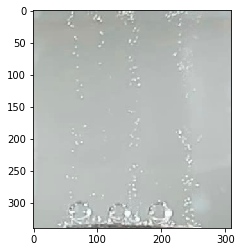

In [5]:
plt.imshow(frame)

In [6]:
# 1. Convert to grayscale
frame_gray = frame.mean(axis = 2)
# 2. Set the intensities between 0 and 1
frame_float = img_as_float(frame_gray.astype(np.uint8))
# 3. Get the edges using canny, sigma = 0.8
frame_edges = feature.canny(frame_float, sigma = 0.8)
frame_edges = img_as_float(frame_edges)
# 4. Closing the edges (morphological operation, first make dilation, second erosion) with a 3,4 kernel
kernel = np.ones((3,4),np.uint8)
frame_closing = cv2.morphologyEx(frame_edges, cv2.MORPH_CLOSE, kernel)
# 5. Labeling
frame_labeled = two_scan_labeling(frame_closing)
# 6. Remove big labels (more than 500 pixels)
frame_labeled_th = frame_labeled.copy()
labels = np.unique(frame_labeled)
for l in labels[1:]:
    s = frame_labeled[frame_labeled == l].shape[0]
    if s > 500:
        frame_labeled_th[frame_labeled == l] = 0

In [7]:
frame_labeled = 255 - frame_labeled
frame_labeled[frame_labeled == 255] = 0
frame_labeled_th = 255 - frame_labeled_th
frame_labeled_th[frame_labeled_th == 255] = 0

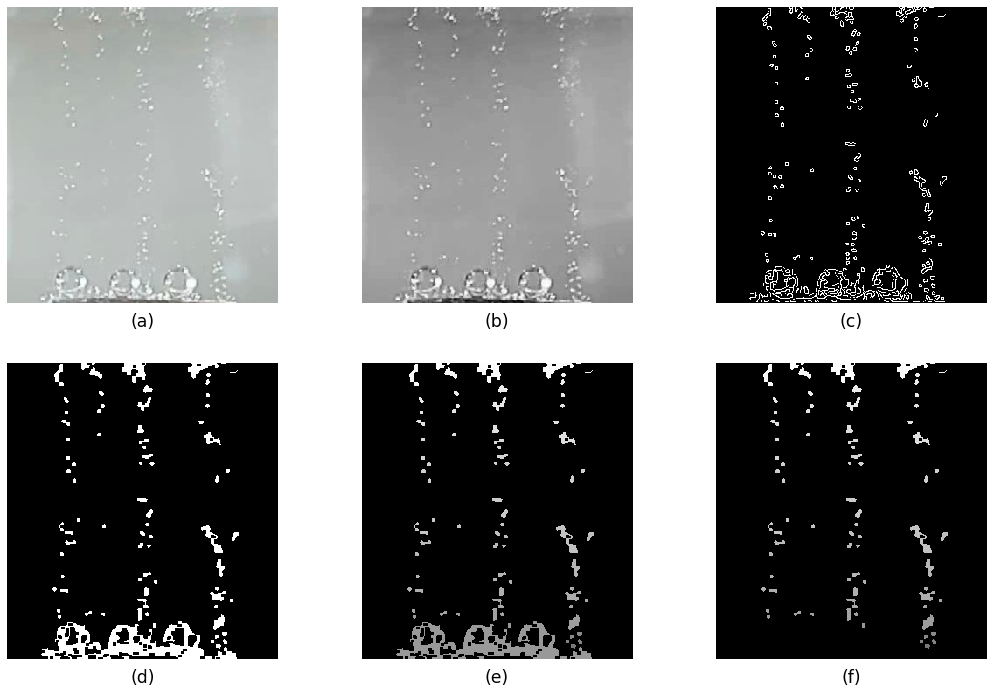

In [8]:
plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
plt.axis('off')
plt.title('(a)', y=-0.1, fontsize = 'xx-large')
plt.imshow(frame)
plt.subplot(2,3,2)
plt.axis('off')
plt.title('(b)', y=-0.1, fontsize = 'xx-large')
plt.imshow(frame_gray, cmap = 'gray')
plt.subplot(2,3,3)
plt.axis('off')
plt.title('(c)', y=-0.1, fontsize = 'xx-large')
plt.imshow(frame_edges, cmap = 'gray')
plt.subplot(2,3,4)
plt.axis('off')
plt.title('(d)', y=-0.1, fontsize = 'xx-large')
plt.imshow(frame_closing, cmap = 'gray')
plt.subplot(2,3,5)
plt.axis('off')
plt.title('(e)', y=-0.1, fontsize = 'xx-large')
plt.imshow(frame_labeled, cmap = 'gray', vmin = 0, vmax = 255)
plt.subplot(2,3,6)
plt.axis('off')
plt.title('(f)', y=-0.1, fontsize = 'xx-large')
plt.imshow(frame_labeled_th, cmap = 'gray', vmin = 0, vmax = 255)

In [3]:
img_big_train = cv2.imread('../images/frame_6883.png')
img_big_test = cv2.imread('../images/frame_big_pred.jpeg')

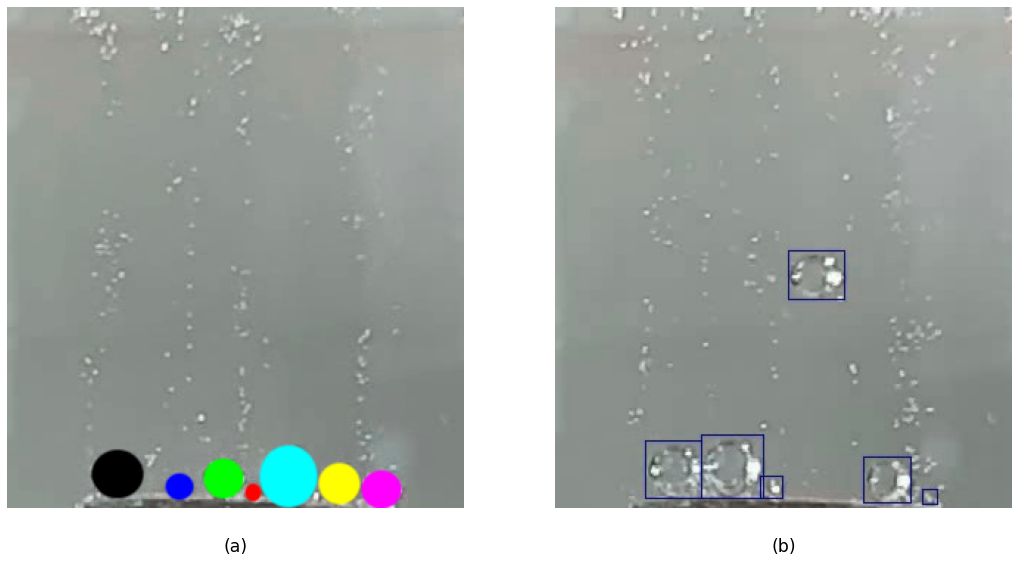

In [4]:
plt.figure(figsize=(18,12))
plt.subplot(1,2,1)
plt.axis('off')
plt.title('(a)', y=-0.1, fontsize = 'xx-large')
plt.imshow(img_big_train)
plt.subplot(1,2,2)
plt.axis('off')
plt.title('(b)', y=-0.1, fontsize = 'xx-large')
plt.imshow(img_big_test, cmap = 'gray')

In [5]:
import json
f = open('../data/10.json')
lines = f.readlines()
len(lines)

4525

In [12]:
f = open('../data/10.json')

In [13]:
lines = f.readlines()

In [14]:
len(lines)

4525

In [6]:
n = 5
js = []
for i in range(n):
    j = json.loads(lines[4515 + i])
    js.append(j)
#j = json.loads(lines[4516])
    print(j)

{'id': 5053, 'boxes': [[165.1059112548828, 274.57830810546875, 220.302001953125, 329.69677734375]], 'scores': [0.9968796968460083]}
{'id': 5054, 'boxes': [[165.3911895751953, 225.97999572753906, 218.8443145751953, 272.4441223144531]], 'scores': [0.9951044321060181]}
{'id': 5055, 'boxes': [[164.3808135986328, 152.60983276367188, 220.01467895507812, 195.41062927246094]], 'scores': [0.9964181184768677]}
{'id': 5056, 'boxes': [[166.70652770996094, 72.49195861816406, 223.63397216796875, 119.09742736816406]], 'scores': [0.9937173128128052]}
{'id': 5057, 'boxes': [[179.8533172607422, 0.0, 235.9788818359375, 41.61481857299805]], 'scores': [0.9696319699287415]}


In [7]:
video2 = cv2.VideoCapture('../videos/Acid_310x340.mp4')
frame2 = None
for i in range(5052):
    ret, frame2 = video2.read()
frames = []
for i in range(n):
    ret, frame2 = video2.read()
    frames.append(frame2)

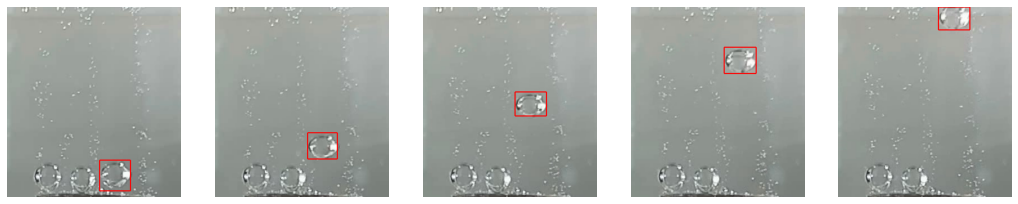

In [8]:
plt.figure(figsize=(18,18))
for i in range(n):
    frame3 = frames[i].copy()
    j = js[i]
    x1 = int(j['boxes'][0][1])
    y1 = int(j['boxes'][0][0])
    x2 = int(j['boxes'][0][3])
    y2 = int(j['boxes'][0][2])

    pad = 1
    
    frame3[x1,y1:y2] = np.array([255,0,0])
    if i != n - 1:
        frame3[x1-1,y1:y2] = np.array([255,0,0])
    frame3[x2,y1:y2] = np.array([255,0,0])
    frame3[x2-1,y1:y2] = np.array([255,0,0])
    frame3[x1:x2,y1] = np.array([255,0,0])
    frame3[x1:x2,y1-1] = np.array([255,0,0])
    frame3[x1:x2,y2] = np.array([255,0,0])
    frame3[x1:x2,y2-1] = np.array([255,0,0])
    plt.subplot(1,5,i + 1)
    plt.axis('off')
    plt.imshow(frame3)